<a href="https://colab.research.google.com/github/PinRay22/Big-Data-Analytics-for-Finance/blob/main/week2%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


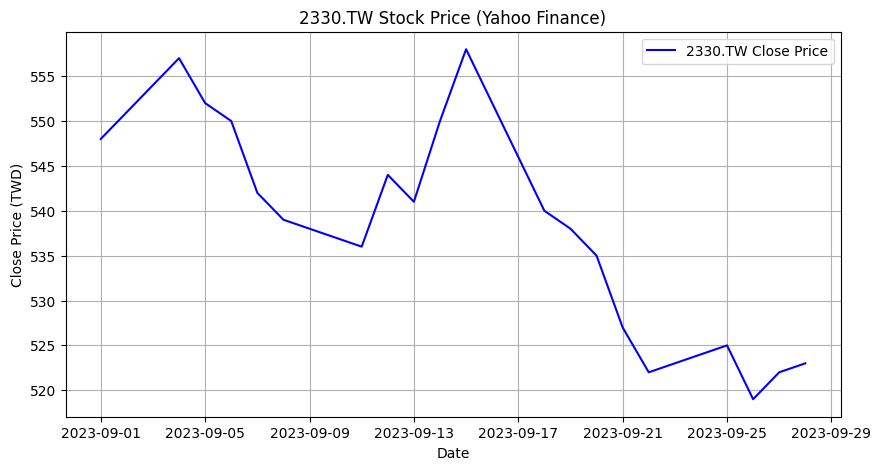

In [ ]:
# 在 Colab 上安裝 yfinance
!pip install yfinance

import yfinance as yf
import matplotlib.pyplot as plt

# 設定股票代號（例如，台積電為 '2330.TW'）
stock_symbol = '2330.TW'

# 獲取股價資料（設定開始與結束日期）
stock_data = yf.download(stock_symbol, start='2023-09-01', end='2023-09-29')

# 繪製收盤價走勢圖
plt.figure(figsize=(10, 5))
plt.plot(stock_data['Close'], label=f'{stock_symbol} Close Price', color='blue')
plt.title(f'{stock_symbol} Stock Price (Yahoo Finance)')
plt.xlabel('Date')
plt.ylabel('Close Price (TWD)')
plt.legend()
plt.grid()
plt.show()


0    112/09/01
1    112/09/04
2    112/09/05
3    112/09/06
4    112/09/07
Name: 日期, dtype: object


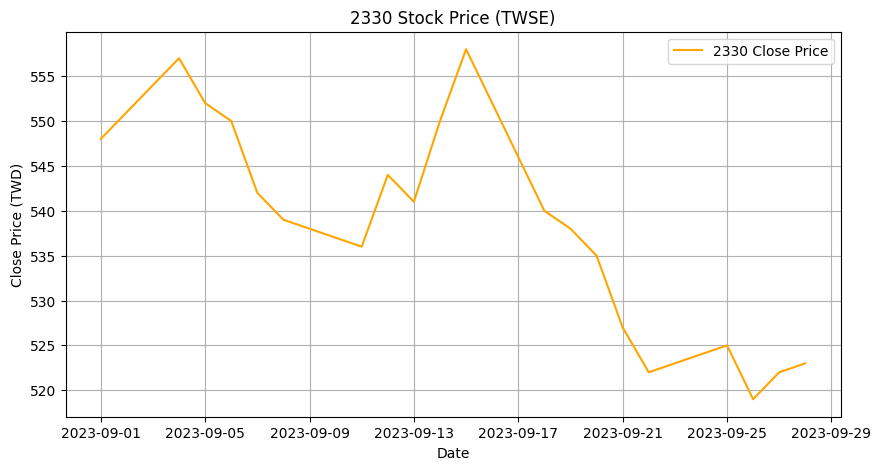

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# 設定股票代號（例如，台積電為 '2330'）
stock_symbol = '2330'
# 設定查詢日期 (格式為 YYYYMMDD)
date = '20230901'

# 台灣證券交易所 API URL
url = f'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date={date}&stockNo={stock_symbol}'

# 發送 HTTP GET 請求
response = requests.get(url)
data = response.json()

# 將資料轉換為 DataFrame
df = pd.DataFrame(data['data'], columns=data['fields'])

# 檢查日期格式
print(df['日期'].head())

# 將民國年份轉換為西元年份
# 定義轉換函數
def convert_to_ad(date_str):
    # 拆分民國日期，格式為 "民國/月份/日期"
    parts = date_str.split('/')
    year = int(parts[0]) + 1911  # 民國年份 + 1911 = 西元年份
    return f'{year}/{parts[1]}/{parts[2]}'

# 轉換日期格式
df['日期'] = df['日期'].apply(convert_to_ad)

# 將日期轉換為 datetime 格式，並設為索引
df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')
df.set_index('日期', inplace=True)

# 將收盤價轉換為數值格式
df['收盤價'] = df['收盤價'].str.replace(',', '').astype(float)

# 繪製收盤價走勢圖
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['收盤價'], label=f'{stock_symbol} Close Price', color='orange')
plt.title(f'{stock_symbol} Stock Price (TWSE)')
plt.xlabel('Date')
plt.ylabel('Close Price (TWD)')
plt.legend()
plt.grid()
plt.show()

